# Practice notebook for confidence intervals using NHANES data

This notebook will give you the opportunity to practice working with confidence intervals using the NHANES data.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Restrict the sample to women between 35 and 50, then use the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to partition this sample into two groups - women who are currently married, and women who are not currently married.  Within each of these groups, calculate the proportion of women who have completed college.  Calculate 95% confidence intervals for each of these proportions.

In [2]:
# enter your code here

# making data human readable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

# extrapoliting female
dfemale = da[da['RIAGENDRx'] == 'Female']

# extrapolating age range between 35 and 50
dfemale['agerange'] = pd.cut(dfemale['RIDAGEYR'], (35,50))
dfemale_age = dfemale[dfemale['agerange'].notna()]

# making data human readable again (have to go over this again to know why regex doesn't work)
dfemale_age['DMDMARTL'] = dfemale_age['DMDMARTL'].replace({1: 'Married', 2: 'Not_Married', 3: 'Not_Married', 4: 'Not_Married', 5: 'Not_Married', 6: 'Not_Married', 77: np.nan, 99: np.nan})
dfemale_age['DMDEDUC2'] = dfemale_age['DMDEDUC2'].replace({5: 'Graduated', 1: 'Not_Graduated', 2: 'Not_Graduated', 3: 'Not_Graduated', 4: 'Not_Graduated', 9: np.nan})

# dropping nan values
data_clean = dfemale_age[['DMDMARTL', 'DMDEDUC2']].dropna()

# creating crosstab
crosstab = pd.crosstab(data_clean.DMDEDUC2, data_clean.DMDMARTL)
print(crosstab)

DMDMARTL       Married  Not_Married
DMDEDUC2                           
Graduated          154           67
Not_Graduated      265          254


In [3]:
# calculating sample proportion of graduated and sample size
prop_total = data_clean.groupby(data_clean.DMDMARTL).agg({"DMDEDUC2": [lambda x: np.mean(x=="Graduated"), np.size]})
prop_total.columns = ["Proportion", "Total_n"]
print(prop_total)

             Proportion  Total_n
DMDMARTL                        
Married        0.367542      419
Not_Married    0.208723      321


In [4]:
p = prop_total.Proportion.Married # Married proportion
n = prop_total.Total_n.Married # Total number of married
se_married = np.sqrt(p * (1 - p) / n)
print(f'Married standard error: {se_married}')

p = prop_total.Proportion.Not_Married # Not married proportion
n = prop_total["Total_n"].Not_Married # Total number of not married
se_not_married = np.sqrt(p * (1 - p) / n)
print(f'Not married standard error: {se_not_married}')

Married standard error: 0.02355386941414772
Not married standard error: 0.022682802482912778


__Q1a.__ Identify which of the two confidence intervals is wider, and explain why this is the case. 

In [5]:
ci_married = sm.stats.proportion_confint(154, 154+265)
ci_not_married = sm.stats.proportion_confint(67, 67+254)
print(ci_married)
print(ci_not_married)
ci_married_size = ci_married[1] - ci_married[0]
ci_not_married_size = ci_not_married[1] - ci_not_married[0]
print(ci_married_size, ci_not_married_size)

# ci of married woman sample is larger, because the standard error is larger since the proportion is closer to 1/2

(0.3213770303614961, 0.41370650185807434)
(0.16426526549807702, 0.2531802173679666)
0.09232947149657822 0.08891495186988957


__Q1b.__ Write 1-2 sentences summarizing these findings for an audience that does not know what a confidence interval is (the goal here is to report the substance of what you learned about how marital status and educational attainment are related, not to teach a person what a confidence interval is).

From our data, we can see that both the samples means fall in the confidence interval: this allows us to say with 95% certainty that the proportion of our samples is representative of the true population. Given this, we can see that the proportion of graduated married woman is bigger than the proportion of unmarried graduated woman. This can leads us to think that a married woman has more chance of getting a college degree than a not married one. Anyway, we have to consider that we choose to look at wether the women were married at the time of the survey, not at the time of their graduation, and this can lead to some biases in the calculation.

## Question 2

Construct 95% confidence intervals for the proportion of smokers who are female, and for the proportion of smokers who are male.  Then construct a 95% confidence interval for the difference between these proportions.

In [26]:
# enter your code here

# code in workbook

__Q2a.__ Discuss why it may be relevant to report the proportions of smokers who are female and male, and contrast this to reporting the proportions of males and females who smoke.

This will allow us to look at the same data from two different perspective: considering only a smoking sample, we can look at the proportions between males and females, and considering the proportions of male and females who smokes can give us insight about which gender smokes the most.

__Q2b.__ How does the width of the confidence interval for the difference of the two proportions compare to the widths of the confidence intervals for each proportion separately?

The width of the confidence interval for the difference is slightly bigger than each of the separates ones. This is probabilly because we have to account two different proportions, anyway our mean falls again into the confidence interval.

## Question 3

Construct a 95% interval for height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)) in centimeters.  Then convert height from centimeters to inches by dividing by 2.54, and construct a 95% confidence interval for height in inches.  Finally, convert the endpoints (the lower and upper confidence limits) of the confidence interval from inches to back to centimeters   

In [59]:
# enter your code here

# calculating mean, sample size and standard deviation
height_mean = da['BMXHT'].mean()
height_n = da['BMXHT'].count()
height_std = np.std(da['BMXHT'])

# calculating lower and upper confidence interval points (sample size - 1 since is a sample and not the entire population)
low_cil = height_mean - (height_std / np.sqrt(height_n - 1)) * 1.96
print(round(low_cil, 2))
upp_cil = height_mean + (height_std / np.sqrt(height_n - 1)) * 1.96
print(round(upp_cil, 2))


165.88
166.41


In [63]:
# converting cm to inches
height_inches = da['BMXHT'] / 2.54

#calculating mean, standard deviation and sample size (should be the same as before)
inches_mean = height_inches.mean()
inches_std = np.std(da['BMXHT'])
inches_n = da['BMXHT'].count()

# calculating lower and upper confidence interval points
low_cil_inches = inches_mean - (inches_std / np.sqrt(inches_n - 1)) * 1.96
print(round(low_cil_inches, 2))
upp_cil_inches = inches_mean + (inches_std / np.sqrt(inches_n - 1)) * 1.96
print(round(upp_cil_inches, 2))

# converting back to cm
print(low_cil_inches * 2.54)
print(upp_cil_inches * 2.54)

65.15
65.67
165.4766228575442
166.80904610067807


__Q3a.__ Describe how the confidence interval constructed in centimeters relates to the confidence interval constructed in inches.

There is a small difference between the two, I guess it's because of rounding during the calculation.

## Question 4

Partition the sample based on 10-year age bands, i.e. the resulting groups will consist of people with ages from 18-28, 29-38, etc. Construct 95% confidence intervals for the difference between the mean BMI for females and for males within each age band.

Text(0, 0.5, 'Female - male BMI difference')

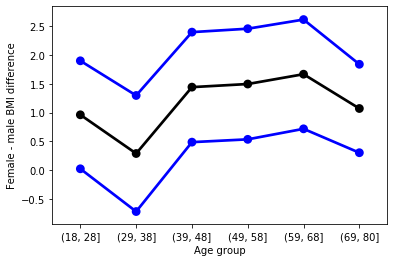

In [71]:
# enter your code here

# setting bins
bins = pd.IntervalIndex.from_tuples([(18, 28), (29, 38), (39, 48), (49, 58), (59, 68), (69, 80)])

# creating age groups
da["agegrp"] = pd.cut(da.RIDAGEYR, bins)

# creating dataframe to work on
pr = da.groupby(["agegrp", "RIAGENDRx"]).agg({"BMXBMI": [np.mean, np.std, np.size]}).unstack()

# Calculate the SEM for females and for males within each age band
pr["BMXBMI", "sem", "Female"] = pr["BMXBMI", "std", "Female"] / np.sqrt(pr["BMXBMI", "size", "Female"]) 
pr["BMXBMI", "sem", "Male"] = pr["BMXBMI", "std", "Male"] / np.sqrt(pr["BMXBMI", "size", "Male"]) 

# Calculate the mean difference of BMI between females and males within each age band, also  calculate
# its SE and the lower and upper limits of its 95% CI.
pr["BMXBMI", "mean_diff", ""] = pr["BMXBMI", "mean", "Female"] - pr["BMXBMI", "mean", "Male"]
pr["BMXBMI", "sem_diff", ""] = np.sqrt(pr["BMXBMI", "sem", "Female"]**2 + pr["BMXBMI", "sem", "Male"]**2) 
pr["BMXBMI", "lcb_diff", ""] = pr["BMXBMI", "mean_diff", ""] - 1.96 * pr["BMXBMI", "sem_diff", ""] 
pr["BMXBMI", "ucb_diff", ""] = pr["BMXBMI", "mean_diff", ""] + 1.96 * pr["BMXBMI", "sem_diff", ""]

# Plot the mean difference in black and the confidence limits in blue
x = np.arange(pr.shape[0])
pp = sns.pointplot(x, pr["BMXBMI", "mean_diff", ""], color='black')
sns.pointplot(x, pr["BMXBMI", "lcb_diff", ""], color='blue')
sns.pointplot(x, pr["BMXBMI", "ucb_diff", ""], color='blue')
pp.set_xticklabels(pr.index)
pp.set_xlabel("Age group")
pp.set_ylabel("Female - male BMI difference")

__Q4a.__ How do the widths of these confidence intervals differ?  Provide an explanation for any substantial diferences in the confidence interval widths that you see.

## Question 5

Construct a 95% confidence interval for the first and second systolic blood pressure measures, and for the difference between the first and second systolic blood pressure measurements within a subject.

In [83]:
# enter code here

# loading the data
blood_df = pd.read_csv("blood_pressure.csv")

# calculating mean, sample size and standard deviation for the first blood pressure measure
first_mean = blood_df['bp_before'].mean()
first_n = blood_df['bp_before'].count()
first_std = np.std(blood_df['bp_before'])

# calculating lower and upper confidence interval points
low_cil_first = first_mean - (first_std / np.sqrt(first_n - 1)) * 1.96
print(low_cil_first)
upp_cil_first = first_mean + (first_std / np.sqrt(first_n - 1)) * 1.96
print(upp_cil_first)
print(first_mean)
print('First mean is in the confidence interval')

# calculating mean, sample size and standard deviation for the second blood pressure measure
second_mean = blood_df['bp_after'].mean()
second_n = blood_df['bp_after'].count()
second_std = np.std(blood_df['bp_after'])

# calculating lower and upper confidence interval points
low_cil_second = second_mean - (second_std / np.sqrt(second_n - 1)) * 1.96
print(low_cil_second)
upp_cil_second = second_mean + (second_std / np.sqrt(second_n - 1)) * 1.96
print(upp_cil_second)
print(second_mean)
print('Second mean is in the confidence interval')


154.41209813778974
158.48790186221024
156.45
First mean is in the confidence interval
148.82163485500865
153.895031811658
151.35833333333332
Second mean is in the confidence interval


In [88]:
# creating a new column with the difference between the two measures for every patient
blood_df['bp_difference'] = blood_df['bp_before'] - blood_df['bp_after']

# calculating mean, sample size and standard deviation for difference
difference_mean = blood_df['bp_difference'].mean()
difference_n = blood_df['bp_difference'].count()
difference_std = np.std(blood_df['bp_difference'])

# calculating lower and upper confidence interval points
low_cil_difference = difference_mean - (difference_std / np.sqrt(difference_n - 1)) * 1.96
print(low_cil_difference)
upp_cil_difference = difference_mean + (difference_std / np.sqrt(difference_n - 1)) * 1.96
print(upp_cil_difference)
print(difference_mean)
print('Difference mean is in the confidence interval')


2.101223963304587
8.082109370028746
5.091666666666667
Difference mean is in the confidence interval


__Q5a.__ Based on these confidence intervals, would you say that a difference of zero between the population mean values of the first and second systolic blood pressure measures is consistent with the data?

Our confidence interval for the difference is between 2 and 8 (rounded), so a difference of 0 wouldn't be consistent with the data we have.


__Q5b.__ Discuss how the width of the confidence interval for the within-subject difference compares to the widths of the confidence intervals for the first and second measures.

The width of the confidence interval for the difference is around 6, for the first measures is around 4 and for the second measures around 5

## Question 6

Construct a 95% confidence interval for the mean difference between the average age of a smoker, and the average age of a non-smoker.

In [113]:
# insert your code here

# creating the dataframe
smoke_age = da[['RIDAGEYR', 'SMQ020x']].dropna()

# calculating mean age of smokers, sample size and standard deviation
smoker_mean = smoke_age[smoke_age['SMQ020x'] == 'Yes'].mean()
smoker_n = smoke_age.count()
smoker_std = np.std(smoke_age[smoke_age['SMQ020x'] == 'Yes'])


# calculating mean age of non smokers, sample size and standard deviation
nosmoker_mean = smoke_age[smoke_age['SMQ020x'] == 'No'].mean()
nosmoker_n = smoke_age.count()
nosmoker_std = np.std(smoke_age[smoke_age['SMQ020x'] == 'No'])

# calculating lower and upper confidence interval points for smokers
low_cil_smoker = smoker_mean - (smoker_std / np.sqrt(smoker_n - 1)) * 1.96
print(low_cil_smoker)
upp_cil_smoker = smoker_mean + (smoker_std / np.sqrt(smoker_n - 1)) * 1.96
print(upp_cil_smoker)
print(smoker_mean)

# calculating lower and upper confidence interval points for non smokers
low_cil_nosmoker = nosmoker_mean - (nosmoker_std / np.sqrt(nosmoker_n - 1)) * 1.96
print(low_cil_nosmoker)
upp_cil_nosmoker = nosmoker_mean + (nosmoker_std / np.sqrt(nosmoker_n - 1)) * 1.96
print(upp_cil_nosmoker)
print(nosmoker_mean)


RIDAGEYR    51.644336
SMQ020x           NaN
dtype: float64
RIDAGEYR    52.54885
SMQ020x          NaN
dtype: float64
RIDAGEYR    52.096593
dtype: float64
RIDAGEYR    44.779517
SMQ020x           NaN
dtype: float64
RIDAGEYR    45.740154
SMQ020x           NaN
dtype: float64
RIDAGEYR    45.259836
dtype: float64


__Q6a.__ Use graphical and numerical techniques to compare the variation in the ages of smokers to the variation in the ages of non-smokers.  

In [11]:
# insert your code here

__Q6b.__ Does it appear that uncertainty about the mean age of smokers, or uncertainty about the mean age of non-smokers contributed more to the uncertainty for the mean difference that we are focusing on here?